

### Reading text file

In [168]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import requests
import seaborn as sns
import pprint, time
from sklearn.model_selection import train_test_split
nltk.download('treebank')
from nltk.tokenize import sent_tokenize
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from collections import Counter
from spellchecker import SpellChecker
import random
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics
from sklearn_crfsuite import scorers
import base64
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('punkt')

nltk.download('universal_tagset')

%matplotlib inline

punct = string.punctuation



[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\halapets\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\halapets\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\halapets\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [169]:
# reading file
Product_Reviews = pd.read_csv('C:\\Users\\halapets\\Documents\\LJMU Research_Sentiment Analysis\\AllCombinedProjectLatestFinal.csv',encoding='latin1')

C:\Users\halapets\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [170]:
Product_Reviews.head(20)

,Product,Review,Review Updated,Rating,Date,Title,Good,Bad,Website,GoodBad,TitleGoodBad,ProductPrice,ProductPriceRange,Year
0,Xiaomi Redmi Note 3,"Before starting the review, I want to share an...",Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",Yet another Value for Money product from Xiaomi,NaN,NaN,MouthShut,,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0
1,Xiaomi Redmi Note 3,"Marvelous Mobile just go for it., Value for mo...","Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",Awesome,NaN,NaN,MouthShut,,Awesome,9999,Budget Range,2016.0
2,Xiaomi Redmi Note 3,REDMI NOTE 3*====As you all know xiaomi is a v...,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",Power pack review on Redmi Note 3,NaN,NaN,MouthShut,,Power pack review on Redmi Note 3,9999,Budget Range,2016.0
3,Xiaomi Redmi Note 3,This phone looks verry pretty look like flagsh...,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",Flagship smartfone under 13000rs,NaN,NaN,MouthShut,,Flagship smartfone under 13000rs,9999,Budget Range,2016.0
4,Xiaomi Redmi Note 3,Master piece in such a economical price very g...,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",Boon for mobile,NaN,NaN,MouthShut,,Boon for mobile,9999,Budget Range,2016.0
5,Xiaomi Redmi Note 3,"Very good phone having great picture quality, ...",Best phone ever in the range of 12000 Very go...,4.0,"Jul 17, 2016 12:21 PM",Best phone ever in the range of 12000,NaN,NaN,MouthShut,,Best phone ever in the range of 12000,9999,Budget Range,2016.0
6,Xiaomi Redmi Note 3,I have used many phones till date but this is ...,Best mobile I have used many phones till date...,5.0,"Jul 17, 2016 08:54 AM",Best mobile,NaN,NaN,MouthShut,,Best mobile,9999,Budget Range,2016.0
7,Xiaomi Redmi Note 3,Xiaomi Redmi Note 3 sports a 5.5-inch LCD disp...,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,5.0,"Jul 17, 2016 08:52 AM",Xiami redmi note 3 sports a 2.2 inch lcd & DISIGN,NaN,NaN,MouthShut,,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,9999,Budget Range,2016.0
8,Xiaomi Redmi Note 3,This review is based on 2 weeks of usage.The K...,Ultimate phone This review is based on 2 week...,4.0,"Jul 17, 2016 04:12 AM",Ultimate phone,NaN,NaN,MouthShut,,Ultimate phone,9999,Budget Range,2016.0
9,Xiaomi Redmi Note 3,I bought 32 gb variant with 3 gb ram and also ...,Using since last 2 months GOOD Experience I b...,4.0,"Jul 16, 2016 11:28 PM",Using since last 2 months GOOD Experience,NaN,NaN,MouthShut,,Using since last 2 months GOOD Experience,9999,Budget Range,2016.0


In [171]:
#Reviewing first 20 reviews updated
Product_Reviews.loc[1:20,["Review Updated","Rating"]]


,Review Updated,Rating
1,"Awesome Marvelous Mobile just go for it., Val...",5.0
2,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0
3,Flagship smartfone under 13000rs This phone l...,4.0
4,Boon for mobile Master piece in such a econom...,5.0
5,Best phone ever in the range of 12000 Very go...,4.0
6,Best mobile I have used many phones till date...,5.0
7,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,5.0
8,Ultimate phone This review is based on 2 week...,4.0
9,Using since last 2 months GOOD Experience I b...,4.0
10,Great hardware but not so great software Unde...,3.0


In [172]:
#Reviewing  first 20 TitleGoodBad comments
Product_Reviews.loc[1:20,["TitleGoodBad","Rating"]]

,TitleGoodBad,Rating
1,Awesome,5.0
2,Power pack review on Redmi Note 3,5.0
3,Flagship smartfone under 13000rs,4.0
4,Boon for mobile,5.0
5,Best phone ever in the range of 12000,4.0
6,Best mobile,5.0
7,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,5.0
8,Ultimate phone,4.0
9,Using since last 2 months GOOD Experience,4.0
10,Great hardware but not so great software,3.0


In [173]:
#Reviewing last 10 Review Updated in detail
Product_Reviews.loc[290957:290967,["Review Updated","Rating"]]
list(Product_Reviews["Review Updated"][290957:290967])

['This is one of the best budget phone in the market with cyanogen os and qualcomm octa-core Snapdragon 615 processor. Better camera  Cyanogen OS  1.5Ghz processing speed       Poor battery life Heating issue. ROM fills faster      ',
 'This is still one of the best phones out there in the market. It has the best camera and the cynogen mod os is just a cherry over the top. It also has a octa core snapdragon 615 processor. That helps it to play high end games without lags . It has cynogen mod os which is highly customizable also it has a powerful processor and just has the best camera       Nothing much except heating      ',
 'The specs of the product are up to the standard that it promises. The cut and the matte design are according to my liking. All in all a fair product. Great touch sensor Audio quality Premium feel Great fingerprint scanner Image tones and colours are great.       Battery life Weak processing      ',
 'The overall phone is good. The features are very good. The batt

In [174]:
#Reviewing rating for last 10 TitleGoodBad comments
Product_Reviews.loc[290957:290967,["TitleGoodBad","Rating"]]
list(Product_Reviews["TitleGoodBad"][290957:290967])
                                     

[' Better camera  Cyanogen OS  1.5Ghz processing speed       Poor battery life Heating issue. ROM fills faster      ',
 ' It has cynogen mod os which is highly customizable also it has a powerful processor and just has the best camera       Nothing much except heating      ',
 ' Great touch sensor Audio quality Premium feel Great fingerprint scanner Image tones and colours are great.       Battery life Weak processing      ',
 ' The battery backup is good. The front and the back camera is good.       The quality of the earphones are not that good.  The phone heats up if playing games for a long time.      ',
 ' Octacore processor Full HD display Corning gorilla glass 3 200a0GB00a0RAM Improve PPI 5.5 Inc display00a0 Rootabl (but00a0not00a0in00a0warranty) New00a0manufacturing00a0phon00a0come00a0with VoLTE       Heating00a0problam Bettary00a0performance00a0is00a0bad In00a0old00a0phone00a0there00a0is00a0no00a0volte 1300a0in00a0back00a0and 500a0in00a0front00a0mp camera      ',
 ' At 650020b

In [175]:
list(Product_Reviews.columns)

['Product',
 'Review',
 'Review Updated',
 'Rating',
 'Date',
 'Title',
 'Good',
 'Bad',
 'Website',
 'GoodBad',
 'TitleGoodBad',
 'ProductPrice',
 'ProductPriceRange',
 'Year']

In [176]:
Product_Reviews.shape

(290967, 14)

In [177]:
Product_Reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290967 entries, 0 to 290966
Data columns (total 14 columns):
Product              290967 non-null object
Review               290959 non-null object
Review Updated       290967 non-null object
Rating               290206 non-null float64
Date                 290221 non-null object
Title                281135 non-null object
Good                 9032 non-null object
Bad                  9032 non-null object
Website              290967 non-null object
GoodBad              290967 non-null object
TitleGoodBad         290967 non-null object
ProductPrice         290967 non-null object
ProductPriceRange    290967 non-null object
Year                 290221 non-null float64
dtypes: float64(2), object(12)
memory usage: 31.1+ MB


In [178]:

Product_Reviews.index

RangeIndex(start=0, stop=290967, step=1)


### Changing column name

In [179]:
# Changing column name
Product_Reviews = Product_Reviews.rename(columns={'Review Updated': 'ReviewUpdated'})

In [180]:
list(Product_Reviews.columns)

['Product',
 'Review',
 'ReviewUpdated',
 'Rating',
 'Date',
 'Title',
 'Good',
 'Bad',
 'Website',
 'GoodBad',
 'TitleGoodBad',
 'ProductPrice',
 'ProductPriceRange',
 'Year']

### Dropping duplicates


In [181]:
# Removing duplicates based on Reviews column
Product_Reviews = Product_Reviews.drop_duplicates(subset = 'Review',keep = 'first')

### checking missing values

In [182]:
# checking missing values
Product_Reviews.isnull().sum()

Product                   0
Review                    1
ReviewUpdated             0
Rating                  666
Date                    653
Title                  6433
Good                 260719
Bad                  260719
Website                   0
GoodBad                   0
TitleGoodBad              0
ProductPrice              0
ProductPriceRange         0
Year                    653
dtype: int64

In [183]:
''' selecting columns- not including columns with high missing values'''
ProductReviews_updated = Product_Reviews[['Product', 'ReviewUpdated', 'Rating', 'Date', 'Website','TitleGoodBad','ProductPrice','ProductPriceRange','Year']]

In [184]:
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0


In [185]:
#Checking missing values
ProductReviews_updated.isnull().sum()

Product                0
ReviewUpdated          0
Rating               666
Date                 653
Website                0
TitleGoodBad           0
ProductPrice           0
ProductPriceRange      0
Year                 653
dtype: int64

In [186]:
#dropping missing values
ProductReviews_updated=ProductReviews_updated.dropna()

In [187]:
ProductReviews_updated.isnull().sum()

Product              0
ReviewUpdated        0
Rating               0
Date                 0
Website              0
TitleGoodBad         0
ProductPrice         0
ProductPriceRange    0
Year                 0
dtype: int64

In [188]:
ProductReviews_updated.head(20)

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0
5,Xiaomi Redmi Note 3,Best phone ever in the range of 12000 Very go...,4.0,"Jul 17, 2016 12:21 PM",MouthShut,Best phone ever in the range of 12000,9999,Budget Range,2016.0
6,Xiaomi Redmi Note 3,Best mobile I have used many phones till date...,5.0,"Jul 17, 2016 08:54 AM",MouthShut,Best mobile,9999,Budget Range,2016.0
7,Xiaomi Redmi Note 3,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,5.0,"Jul 17, 2016 08:52 AM",MouthShut,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,9999,Budget Range,2016.0
8,Xiaomi Redmi Note 3,Ultimate phone This review is based on 2 week...,4.0,"Jul 17, 2016 04:12 AM",MouthShut,Ultimate phone,9999,Budget Range,2016.0
9,Xiaomi Redmi Note 3,Using since last 2 months GOOD Experience I b...,4.0,"Jul 16, 2016 11:28 PM",MouthShut,Using since last 2 months GOOD Experience,9999,Budget Range,2016.0


In [189]:
#Mapping Ratings (3 to 5 as 1 and 1 to 2 as 0)
ProductReviews_updated['positive_negative'] = ProductReviews_updated.Rating.map({1:0,2:0,3:1,4:1,5:1})

In [190]:

''' Add a Column Positive_Negative. Dividing the review as positive and negative. 
3star to 5star - Positive ie 1 , 1star to 2star - Negative ie 0 '''
ProductReviews_updated.positive_negative.value_counts()

1    209527
0     56281
Name: positive_negative, dtype: int64

In [191]:
# identifying products by count of reviews
ProductReviewsCounts=pd.DataFrame(ProductReviews_updated.groupby("Product").agg({"Product":"count"}))
ProductReviewsCounts.head()
ProductReviewsCounts.rename(columns = {"Product":"CountofReviews"},inplace = True)
ProductReviewsCounts.sort_values("CountofReviews", ascending = False, inplace = True)
TopProductsbyReviewCounts =ProductReviewsCounts.head(20)
TopProductsbyReviewCounts.to_csv("TopProducts by ReviewCounts.csv", header = True)

ProductReviewsCounts.head(20)

#Xiaomi Redmi Note 3,Samsung Galaxy J2 6 2016 Edition,Xiaomi Redmi Note 4 4GB RAM,Xiaomi Redmi 3S Prime,Xiaomi Redmi 4A

,CountofReviews
Product,
Xiaomi Redmi Note 3,12762
Samsung Galaxy J2 6 2016 Edition,8543
Xiaomi Redmi Note 4 4GB RAM,7815
Xiaomi Redmi 3S Prime,6855
Xiaomi Redmi 4A,5721
Xiaomi Mi A1,5140
Samsung Galaxy J7 Prime,4907
Samsung Galaxy J7,3420
Samsung Galaxy J7 6 2016 Edition,3326


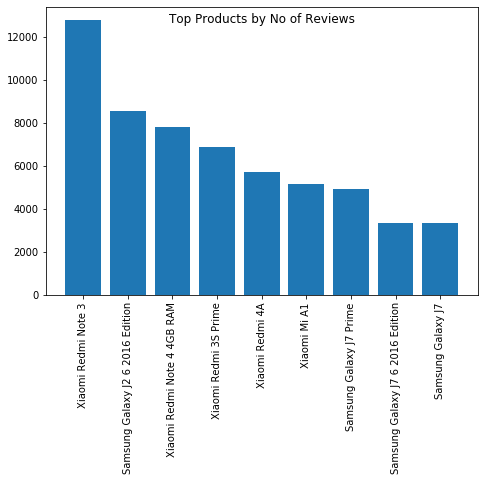

In [219]:
fig = plt.figure()
fig.suptitle("Top Products by No of Reviews")
ax = fig.add_axes([0,0,1,1])
Products = ProductReviewsCounts.index.tolist()[0:9]
CountofReviews = ProductReviewsCounts['CountofReviews'].tolist()[0:9]                        
ax.bar(Products,CountofReviews)
plt.xticks(rotation=90)
plt.savefig("TopProducts-CountofReviews.jpg")
plt.show()

In [197]:
#avg Rating and count of ratings by Year
ProductReviews_updated_Year=ProductReviews_updated.groupby("Year").agg({"Rating":"mean","Product":"count"})
ProductReviews_updated_Year.sort_values("Product",ascending = False,inplace = True)
ProductReviews_updated_Year.rename(columns = {"Rating":"Rating", "Product":"CountofReviews" },inplace = True)
ProductReviews_updated_Year

,Rating,CountofReviews
Year,,
2017.0,3.295750,130414
2016.0,3.872164,91312
2018.0,3.470629,30302
2015.0,3.775549,7427
2006.0,3.833735,830
2013.0,2.994716,757
2008.0,3.644570,709
2014.0,2.839130,690
2007.0,3.736536,687


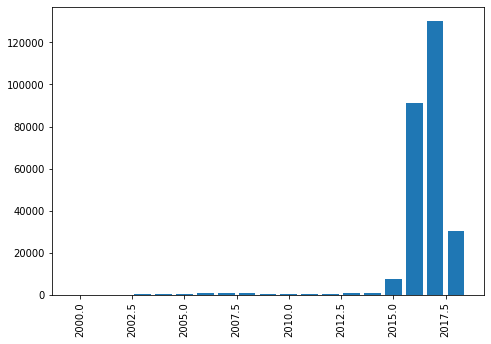

In [198]:
fig = plt.figure()
fig.suptitle("Years by No of Reviews")
ax = fig.add_axes([0,0,1,1])
Year = ProductReviews_updated_Year.index.astype('category').tolist()
CountofReviews = ProductReviews_updated_Year['CountofReviews'].tolist()                   
ax.bar(Year,CountofReviews)
plt.xticks(rotation=90)
plt.savefig("Year-CountofReviews.jpg")
plt.show()


In [199]:
#filtering the ProductReviews_updated dataset for Products having at least 500 reviews
ProductReviews_updated= pd.merge(ProductReviews_updated,ProductReviewsCounts, how = "inner", left_on = "Product", right_index = True)
ProductReviews_updated.shape #265808,11a
ProductReviews_updated.head()


,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762


In [200]:
ProductReviews_updated.shape

(265808, 11)

In [201]:
#Filtering the data with Products more than 1000 reviews and Year 2016 onwards
ProductReviews_updated = ProductReviews_updated[(ProductReviews_updated["CountofReviews"] >= 500) & (ProductReviews_updated["Year"] > 2015)]
ProductReviews_updated.shape

(160057, 11)

In [202]:
ProductReviews_updated=ProductReviews_updated.reset_index(drop=True)
ProductReviews_updated.head()


,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762


In [205]:
# identifying products by count of reviews post filtering data for 2016,2017 and 2018 + Products with at least 500 Reviews
ProductReviewsCounts=pd.DataFrame(ProductReviews_updated.groupby("Product").agg({"Product":"count"}))
ProductReviewsCounts.head()
ProductReviewsCounts.rename(columns = {"Product":"CountofReviews"},inplace = True)
ProductReviewsCounts.sort_values("CountofReviews", ascending = False, inplace = True)
TopProductsbyReviewCounts =ProductReviewsCounts.head(20)
TopProductsbyReviewCounts.to_csv("TopProducts by ReviewCounts.csv", header = True)

ProductReviewsCounts.head(20)


,CountofReviews
Product,
Xiaomi Redmi Note 3,12762
Samsung Galaxy J2 6 2016 Edition,8543
Xiaomi Redmi Note 4 4GB RAM,7815
Xiaomi Redmi 3S Prime,6855
Xiaomi Redmi 4A,5721
Xiaomi Mi A1,5140
Samsung Galaxy J7 Prime,4907
Samsung Galaxy J7 6 2016 Edition,3326
Samsung Galaxy J7,3309


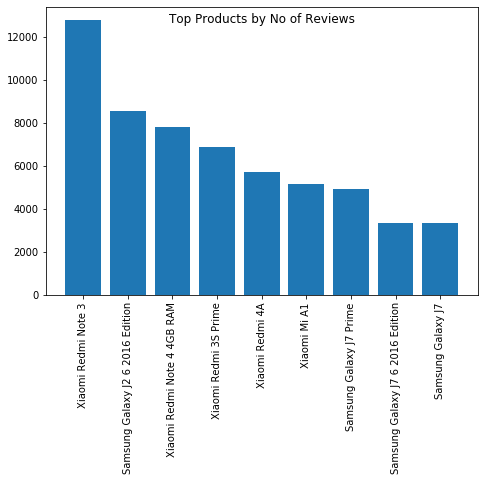

In [218]:
fig = plt.figure()
fig.suptitle("Top Products by No of Reviews")
ax = fig.add_axes([0,0,1,1])
Products = ProductReviewsCounts.index.tolist()[0:9]
CountofReviews = ProductReviewsCounts['CountofReviews'].tolist()[0:9]                        
ax.bar(Products,CountofReviews)
plt.xticks(rotation=90)
plt.savefig("TopProducts-CountofReviews1.jpg")
plt.show()

#Xiaomi Redmi Note 3,Samsung Galaxy J2 6 2016 Edition,Xiaomi Redmi Note 4 4GB RAM,Xiaomi Redmi 3S Prime,Xiaomi Redmi 4A,
#Xiaomi Mi A1,Samsung Galaxy J7 Prime

In [207]:
# identifying products by avg ratinga
AvgRatingbyProducts=pd.DataFrame(ProductReviews_updated.groupby("Product").agg({"Rating":"mean"}))
AvgRatingbyProducts.head()
AvgRatingbyProducts.rename(columns = {"Rating":"AvgRating"},inplace = True)
AvgRatingbyProducts.sort_values("AvgRating", ascending = False, inplace = True)
AvgRatingbyProducts.head(20)


,AvgRating
Product,
OnePlus 3,4.431489
Samsung Galaxy S7 Edge,4.272990
Apple iPhone 6S,4.220872
Apple iPhone 6S Plus,4.191296
Samsung Galaxy S7,4.167845
Xiaomi Redmi Note 5 Pro 6GB RAM,4.118998
Apple iPhone 7,4.117454
Samsung Galaxy S8,4.074545
Coolpad Dazen Note 3,4.070565


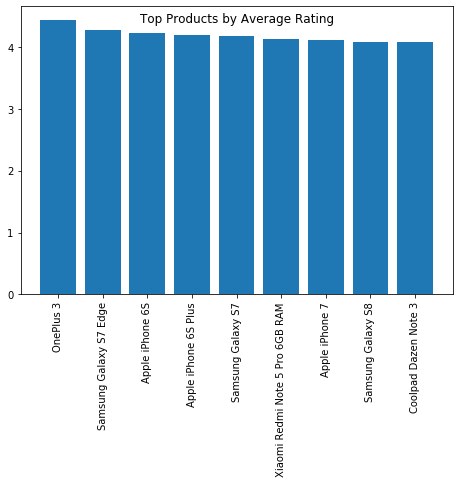

In [217]:
fig = plt.figure()
fig.suptitle("Top Products by Average Rating")
ax = fig.add_axes([0,0,1,1])
Products = AvgRatingbyProducts.index.tolist()[0:9]
AvgRating = AvgRatingbyProducts['AvgRating'].tolist()[0:9]                        
ax.bar(Products,AvgRating)
plt.xticks(rotation=90)
plt.savefig("TopProducts-AvgRating.jpg")
plt.show()

#OnePlus 3, Samsung Galaxy S7 Edge, Apple iPhone 6S, Apple iPhone 6S Plus,Samsung Galaxy S7, Xiaomi Redmi Note 5 Pro 6GB RAM,
#Apple iPhone 7,Samsung Galaxy S8

In [209]:

# identifying top products by avg rating
TopProductsbyAvgRating = AvgRatingbyProducts.head(20)
#writing dataframe
TopProductsbyAvgRating.to_csv("TopProducts by AvgRating.csv", header = True)
AvgRatingbyProducts.head(20)

#Top Products by Avg Rating

#OnePlus 3, Samsung Galaxy S7 Edge, Apple iPhone 6S, Apple iPhone 6S Plus, Samsung Galaxy S7

,AvgRating
Product,
OnePlus 3,4.431489
Samsung Galaxy S7 Edge,4.272990
Apple iPhone 6S,4.220872
Apple iPhone 6S Plus,4.191296
Samsung Galaxy S7,4.167845
Xiaomi Redmi Note 5 Pro 6GB RAM,4.118998
Apple iPhone 7,4.117454
Samsung Galaxy S8,4.074545
Coolpad Dazen Note 3,4.070565


In [210]:
''' Merging the Dataframes ProductReviews_updated and AvgProductRating with the help of merge '''

ProductReviews_updated = pd.merge(ProductReviews_updated, AvgRatingbyProducts,how = "left", left_on = "Product", right_index = True)

ProductReviews_updated.head()


,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376


In [211]:

''' Created a New Column 'ProductRatingClassification' Dividing the products into 3 categories Product Highly Rated,
 Product Moderately Rated and Product Poorly Rated based on Average Rating '''
conditions = [(ProductReviews_updated["AvgRating"] >=3),(ProductReviews_updated["AvgRating"] < 3)]
choices = ["Positive Rating","Negative Rating"]
ProductReviews_updated["AvgRatingScore"] = np.select(conditions,choices)
ProductReviews_updated.head()




,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating


In [212]:
#Based on Positive_negative column adding tags
conditions = [(ProductReviews_updated["positive_negative"] == 1),(ProductReviews_updated["positive_negative"] == 0)]
choices = ["Positive Rating","Negative Rating"]
ProductReviews_updated["Positive_Negative_Tag"] = np.select(conditions, choices)
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating


In [213]:
# ******reviews where Review level Ratings (Positive->=3, Negative-<3) and Product Level Rating match

ProductReviews_updated.shape#265808
(ProductReviews_updated["AvgRatingScore"] == ProductReviews_updated["Positive_Negative_Tag"]).sum()#132792


132792

In [78]:
#Top Products by Positive Sentiments
TopProductsbyTotalPostiveVote = ProductReviews_updated[ProductReviews_updated["positive_negative"] == 1]
TopProductsbyTotalPostiveVote = TopProductsbyTotalPostiveVote.groupby("Product").agg({"positive_negative":"sum"})
TopProductsbyTotalPostiveVote.rename(columns={"positive_negative":"No of Positive Sentiments"},inplace = True)
TopProductsbyTotalPostiveVote.sort_values("No of Positive Sentiments", ascending = False, inplace = True)
TopProductsbyTotalPostiveVote = TopProductsbyTotalPostiveVote.head(20)
#writing dataframe
TopProductsbyTotalPostiveVote.to_csv("TopProducts by Total Postive Vote.csv", header = True)
TopProductsbyTotalPostiveVote.head(20)

,No of Positive Sentiments
Product,
Xiaomi Redmi Note 3,11748
Xiaomi Redmi Note 4 4GB RAM,6999
Samsung Galaxy J2 6 2016 Edition,6711
Xiaomi Redmi 3S Prime,6341
Xiaomi Redmi 4A,4979
Xiaomi Mi A1,4661
Samsung Galaxy J7 Prime,4211
Samsung Galaxy J7 6 2016 Edition,2976
Samsung Galaxy J7,2871


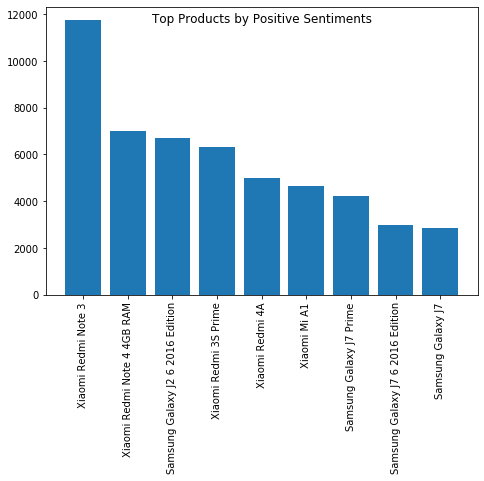

In [216]:
fig = plt.figure()
fig.suptitle("Top Products by Positive Sentiments")
ax = fig.add_axes([0,0,1,1])
Products = TopProductsbyTotalPostiveVote.index.tolist()[0:9]
Positive_Sentiments = TopProductsbyTotalPostiveVote['No of Positive Sentiments'].tolist()[0:9]                        
ax.bar(Products,Positive_Sentiments)
plt.xticks(rotation=90)
plt.savefig("TopProducts-Positive_Sentiments.jpg")
plt.show()

#Xiaomi Redmi Note 3, Xiaomi Redmi Note 4 4GB RAM,Samsung Galaxy J2 6 2016 Edition,Xiaomi Redmi 3S Prime,Xiaomi Redmi 4A,
#Xiaomi Mi A1,Samsung Galaxy J7 Prime

In [220]:
#Top Products by Negative Sentiments
TopProductsbyTotalNegativeVote = ProductReviews_updated[ProductReviews_updated["positive_negative"] == 0]
TopProductsbyTotalNegativeVote = TopProductsbyTotalNegativeVote.groupby("Product").agg({"positive_negative":"count"})
TopProductsbyTotalNegativeVote.rename(columns={"positive_negative":"No of Negative Sentiments"},inplace = True)
TopProductsbyTotalNegativeVote.sort_values("No of Negative Sentiments", ascending = False, inplace = True)
TopProductsbyTotalNegativeVote = TopProductsbyTotalNegativeVote.head(20)
#writing dataframe
TopProductsbyTotalNegativeVote.to_csv("TopProducts by Total Negative Vote.csv", header = True)
TopProductsbyTotalNegativeVote.head(20)

,No of Negative Sentiments
Product,
Samsung Galaxy J2 6 2016 Edition,1832
Xiaomi Redmi Note 3,1014
Reliance JioPhone,1003
Xiaomi Redmi Note 4 4GB RAM,816
Vivo V5,751
Xiaomi Redmi 4A,742
Samsung Galaxy J7 Prime,696
Vivo V7,682
Samsung Galaxy J2,535


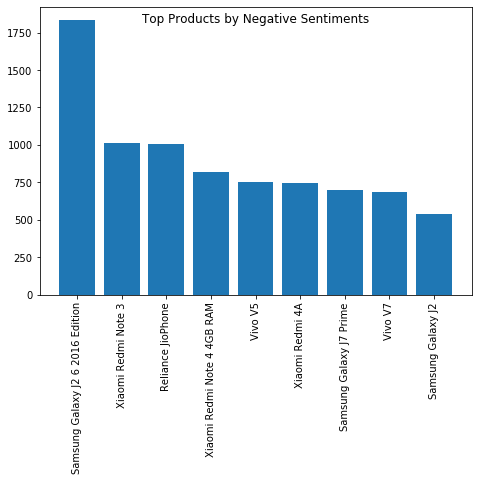

In [221]:
fig = plt.figure()
fig.suptitle("Top Products by Negative Sentiments")
ax = fig.add_axes([0,0,1,1])
Products = TopProductsbyTotalNegativeVote.index.tolist()[0:9]
Negative_Sentiments = TopProductsbyTotalNegativeVote['No of Negative Sentiments'].tolist()[0:9]                        
ax.bar(Products,Negative_Sentiments)
plt.xticks(rotation=90)
plt.savefig("TopProducts-Negative_Sentiments.jpg")
plt.show()

#Samsung Galaxy J2 6 2016 Edition,Xiaomi Redmi Note 3,Reliance JioPhone,Xiaomi Redmi Note 4 4GB RAM,Vivo V5,Xiaomi Redmi 4A,
#Samsung Galaxy J7 Prime

In [222]:
# adding a column to dataframe mentioning the count of reviews
ProductReviews_updated["LengthofReviews"]=ProductReviews_updated.ReviewUpdated.apply(len)
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,344
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,276
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,322
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,333
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,316


In [223]:
''' Sentiment Analysis'''

' Sentiment Analysis'

In [224]:
from textblob import TextBlob

In [225]:
# defining a function to calculate sentiment polarity and subjectivity

def detect_sentimentpolarity(ReviewUpdated):
    blob = TextBlob(ReviewUpdated)
    ''' return the polarity '''
    return blob.sentiment.polarity

In [226]:
def detect_sentimentsubjectivity(ReviewUpdated):
    blob = TextBlob(ReviewUpdated)
    ''' return the subjectivity '''
    return blob.sentiment.subjectivity


In [227]:
#computing polarity for Review
ProductReviews_updated["SentimentPolarity"] = ProductReviews_updated.ReviewUpdated.apply(detect_sentimentpolarity)
ProductReviews_updated.head(10)

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,344,-0.028571
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,276,0.780000
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,322,0.474444
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,333,0.502500
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,316,0.448571
5,Xiaomi Redmi Note 3,Best phone ever in the range of 12000 Very go...,4.0,"Jul 17, 2016 12:21 PM",MouthShut,Best phone ever in the range of 12000,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,338,0.585000
6,Xiaomi Redmi Note 3,Best mobile I have used many phones till date...,5.0,"Jul 17, 2016 08:54 AM",MouthShut,Best mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,312,0.410985
7,Xiaomi Redmi Note 3,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,5.0,"Jul 17, 2016 08:52 AM",MouthShut,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,342,0.135714
8,Xiaomi Redmi Note 3,Ultimate phone This review is based on 2 week...,4.0,"Jul 17, 2016 04:12 AM",MouthShut,Ultimate phone,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,303,0.187500
9,Xiaomi Redmi Note 3,Using since last 2 months GOOD Experience I b...,4.0,"Jul 16, 2016 11:28 PM",MouthShut,Using since last 2 months GOOD Experience,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,330,0.300000


In [228]:

#computing polarity for Review
ProductReviews_updated["SentimentSubjectivity"] = ProductReviews_updated.ReviewUpdated.apply(detect_sentimentsubjectivity)
ProductReviews_updated.head(10)

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,344,-0.028571,0.576190
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,276,0.780000,0.640000
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,322,0.474444,0.477037
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,333,0.502500,0.832500
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,316,0.448571,0.627857
5,Xiaomi Redmi Note 3,Best phone ever in the range of 12000 Very go...,4.0,"Jul 17, 2016 12:21 PM",MouthShut,Best phone ever in the range of 12000,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,338,0.585000,0.538333
6,Xiaomi Redmi Note 3,Best mobile I have used many phones till date...,5.0,"Jul 17, 2016 08:54 AM",MouthShut,Best mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,312,0.410985,0.464394
7,Xiaomi Redmi Note 3,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,5.0,"Jul 17, 2016 08:52 AM",MouthShut,Xiami redmi note 3 sports a 2.2 inch lcd & DIS...,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,342,0.135714,0.342857
8,Xiaomi Redmi Note 3,Ultimate phone This review is based on 2 week...,4.0,"Jul 17, 2016 04:12 AM",MouthShut,Ultimate phone,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,303,0.187500,0.762500
9,Xiaomi Redmi Note 3,Using since last 2 months GOOD Experience I b...,4.0,"Jul 16, 2016 11:28 PM",MouthShut,Using since last 2 months GOOD Experience,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,330,0.300000,0.322917


In [229]:
len(ProductReviews_updated.Product.unique())#1719 Unique Products

112

In [230]:
ProductReviews_updated.Year.unique()#Reviews from 2000 to 2018

array([2016., 2017., 2018.])

In [231]:
#avg Rating and count of ratings by Year
ProductReviews_updated_Year=ProductReviews_updated.groupby("Year").agg({"Rating":"mean","Product":"count"})
ProductReviews_updated_Year.sort_values("Product",ascending = False)

,Rating,Product
Year,,
2017.0,3.466140,83166
2016.0,4.029759,59376
2018.0,3.542963,17515


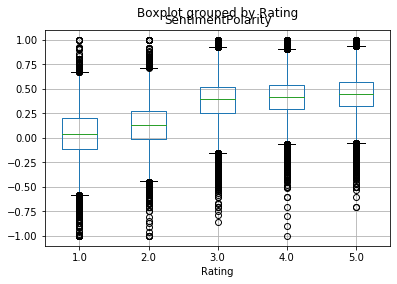

In [232]:
#Polarity by Rating
ProductReviews_updated.boxplot("SentimentPolarity",by = "Rating")
#there is increase in polarity with the increase in Rating


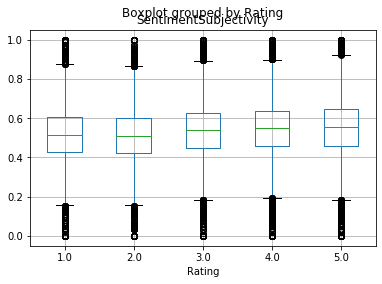

In [233]:
#Subjectivity by Rating
ProductReviews_updated.boxplot("SentimentSubjectivity", by = "Rating")
#there is no change is subjectivity with the increase in rating

In [234]:
#Sentiment Polarity lies between 1 and -1
ProductReviews_updated.SentimentPolarity.min()#-1
ProductReviews_updated.SentimentPolarity.max()#1
ProductReviews_updated.SentimentPolarity.mean()#0.36

0.36038771164847194

In [235]:
#Subjectivity lies between 1 and 0
ProductReviews_updated.SentimentSubjectivity.min()#0.0
ProductReviews_updated.SentimentSubjectivity.max()#1.0
ProductReviews_updated.SentimentSubjectivity.mean()#0.54

0.5392665488674542

In [236]:
type(ProductReviews_updated)

pandas.core.frame.DataFrame

In [237]:
# Classifying the Sentiments based on Sentiment Polarity at review level
conditions = [(ProductReviews_updated["SentimentPolarity"]>=0),(ProductReviews_updated["SentimentPolarity"]<0)]
#choices = ["Positive Review Sentiment","Negative Review Sentiment"]
choices = ["Positive Rating","Negative Rating"]
ProductReviews_updated["SentimentPolarityClass"] = np.select(conditions, choices)
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity,SentimentPolarityClass
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,344,-0.028571,0.576190,Negative Rating
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,276,0.780000,0.640000,Positive Rating
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,322,0.474444,0.477037,Positive Rating
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,333,0.502500,0.832500,Positive Rating
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,316,0.448571,0.627857,Positive Rating


In [241]:
# Average SentimentPolarity by Product
AvgSentimentPolarity = pd.DataFrame(ProductReviews_updated.groupby("Product").SentimentPolarity.mean())

AvgSentimentPolarity.rename(columns={"SentimentPolarity" : "AvgSentPolarity"}, inplace = True)
AvgSentimentPolarity.sort_values("AvgSentPolarity",inplace = True, ascending = False)
AvgSentimentPolarity = AvgSentimentPolarity.head(20)
AvgSentimentPolarity.to_csv("Top Products by Avg Sentiment Polarity.csv",header = True)
AvgSentimentPolarity

,AvgSentPolarity
Product,
Xiaomi Redmi Note 5 Pro 6GB RAM,0.439126
Xiaomi Mi A1,0.426858
Oppo F1s 32GB,0.415347
Xiaomi Redmi 3S Prime,0.411679
Xiaomi Redmi 5A 16GB,0.407070
Oppo Realme 1 128GB,0.405378
Samsung Galaxy S7 Edge,0.403927
Samsung Galaxy S8 64GB,0.403781
Xiaomi Redmi Note 3,0.403533


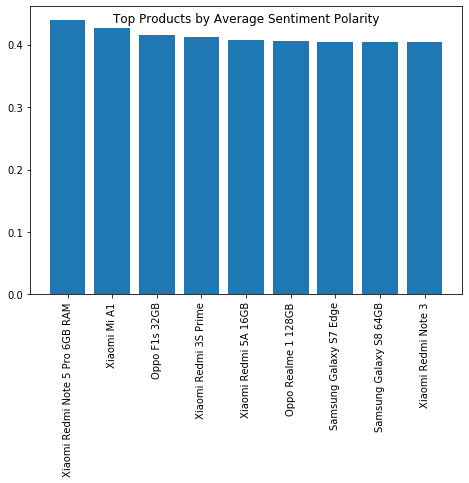

In [242]:
fig = plt.figure()
fig.suptitle("Top Products by Average Sentiment Polarity")
ax = fig.add_axes([0,0,1,1])
Products = AvgSentimentPolarity.index.tolist()[0:9]
AvgSentimentPolarity1 = AvgSentimentPolarity['AvgSentPolarity'].tolist()[0:9]                        
ax.bar(Products,AvgSentimentPolarity1)
plt.xticks(rotation=90)
plt.savefig("TopProducts-AvgRating.jpg")
plt.show()

#Xiaomi Redmi Note 5 Pro 6GB RAM, Xiaomi Mi A1,Oppo F1s 32GB, Xiaomi Redmi 3S Prime,Xiaomi Redmi 5A 16GB

In [243]:
#merging Average Sentiment Polarity with ProductReviews_updated

ProductReviews_updated = pd.merge(ProductReviews_updated,AvgSentimentPolarity, how = "left",left_on = "Product", right_index = True)
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity,SentimentPolarityClass,AvgSentPolarity
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,344,-0.028571,0.576190,Negative Rating,0.403533
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,276,0.780000,0.640000,Positive Rating,0.403533
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,322,0.474444,0.477037,Positive Rating,0.403533
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,333,0.502500,0.832500,Positive Rating,0.403533
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,316,0.448571,0.627857,Positive Rating,0.403533


In [244]:
#Sentiment Classification based on Avg Sentiment Polarity
conditions = [ProductReviews_updated["AvgSentPolarity"]>= 0.33,ProductReviews_updated["AvgSentPolarity"]< 0.33]
#choices = ["Positive Sentiments", "Negative Sentiments"]
choices = ["Positive Rating","Negative Rating"]
ProductReviews_updated["AvgSentimentPolarityClass"] = np.select(conditions,choices)
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,CountofReviews,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity,SentimentPolarityClass,AvgSentPolarity,AvgSentimentPolarityClass
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,344,-0.028571,0.576190,Negative Rating,0.403533,Positive Rating
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,276,0.780000,0.640000,Positive Rating,0.403533,Positive Rating
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,322,0.474444,0.477037,Positive Rating,0.403533,Positive Rating
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,333,0.502500,0.832500,Positive Rating,0.403533,Positive Rating
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,12762,4.058376,Positive Rating,Positive Rating,316,0.448571,0.627857,Positive Rating,0.403533,Positive Rating


In [245]:
#Classification of Sentiment Polarity at review level and classification of Avg Sentiment at product level

# 176119 Reviews out of 265808 reviews where Review level Polarity (Positive->=3, Negative-<3) and Product Level Polarity 
# do match
(ProductReviews_updated["AvgSentimentPolarityClass"] == ProductReviews_updated["SentimentPolarityClass"]).sum()

54046

In [247]:
#Calculting avg sentiment subjectivity at Product level

AvgSentSubjectivity=pd.DataFrame(ProductReviews_updated.groupby("Product").SentimentSubjectivity.mean())
AvgSentSubjectivity.rename(columns = {"SentimentSubjectivity" : "AvgSentimentSubjectivity"},inplace = True)
AvgSentSubjectivity.sort_values("AvgSentimentSubjectivity",inplace = True,ascending = False)

AvgSentSubjectivity = AvgSentSubjectivity.head(20)
AvgSentSubjectivity.to_csv("Top Products by Avg Sentiment Subjectivity.csv", header = True)
AvgSentSubjectivity.head(20)

,AvgSentimentSubjectivity
Product,
Samsung Galaxy Grand Prime,0.596105
Samsung Galaxy Grand 2,0.583581
Samsung Galaxy S8,0.575481
Samsung Galaxy S6 Edge,0.569236
Samsung Galaxy S8 64GB,0.560010
Vivo V5 Plus,0.558876
Vivo V5s,0.557151
LG G2,0.556983
Vivo V9,0.556885


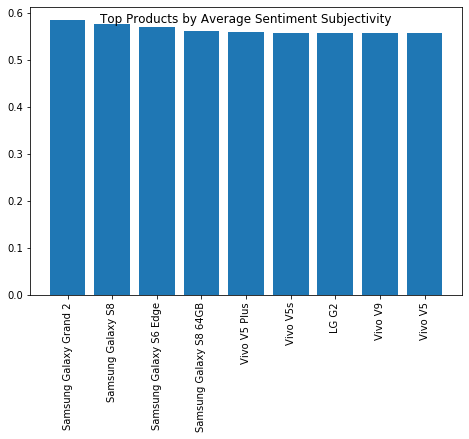

In [249]:
fig = plt.figure()
fig.suptitle("Top Products by Average Sentiment Subjectivity")
ax = fig.add_axes([0,0,1,1])
Products = AvgSentSubjectivity.index.tolist()[1:10]
AvgSentimentSubjectivity1 = AvgSentSubjectivity['AvgSentimentSubjectivity'].tolist()[1:10]
AvgSentimentSubjectivity1                            
ax.bar(Products,AvgSentimentSubjectivity1)
plt. xticks(rotation=90)
plt.savefig("TopProducts-AvgSentSubjectivity.jpg")
plt.show()

#Samsung Galaxy Grand Prime, Samsung Galaxy Grand 2, Samsung Galaxy S8, Samsung Galaxy S6 Edge, Samsung Galaxy S8 64GB

In [250]:
#merging AvgSentSubjectivity and ProductReviews_updated data

ProductReviews_updated = pd.merge(ProductReviews_updated, AvgSentSubjectivity, how = "left", left_on = "Product", right_index = True)
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,...,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity,SentimentPolarityClass,AvgSentPolarity,AvgSentimentPolarityClass,AvgSentimentSubjectivity
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,344,-0.028571,0.576190,Negative Rating,0.403533,Positive Rating,NaN
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,276,0.780000,0.640000,Positive Rating,0.403533,Positive Rating,NaN
2,Xiaomi Redmi Note 3,Power pack review on Redmi Note 3 REDMI NOTE ...,5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,322,0.474444,0.477037,Positive Rating,0.403533,Positive Rating,NaN
3,Xiaomi Redmi Note 3,Flagship smartfone under 13000rs This phone l...,4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,333,0.502500,0.832500,Positive Rating,0.403533,Positive Rating,NaN
4,Xiaomi Redmi Note 3,Boon for mobile Master piece in such a econom...,5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,316,0.448571,0.627857,Positive Rating,0.403533,Positive Rating,NaN


In [251]:
ProductReviews_updated.head(2)

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,...,AvgRating,AvgRatingScore,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity,SentimentPolarityClass,AvgSentPolarity,AvgSentimentPolarityClass,AvgSentimentSubjectivity
0,Xiaomi Redmi Note 3,Yet another Value for Money product from Xiaom...,3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,344,-0.028571,0.57619,Negative Rating,0.403533,Positive Rating,NaN
1,Xiaomi Redmi Note 3,"Awesome Marvelous Mobile just go for it., Val...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,...,4.058376,Positive Rating,Positive Rating,276,0.780000,0.64000,Positive Rating,0.403533,Positive Rating,NaN


In [252]:
LatestMobileReviews = ProductReviews_updated
LatestMobileReviews.shape

(160057, 21)

### Text Processing

In [253]:
LatestMobileReviews["ReviewUpdated"]

0         Yet another Value for Money product from Xiaom...
1         Awesome  Marvelous Mobile just go for it., Val...
2         Power pack review on Redmi Note 3  REDMI NOTE ...
3         Flagship smartfone under 13000rs  This phone l...
4         Boon for mobile  Master piece in such a econom...
                                ...                        
160052    If you guys are looking for a smartphone under...
160053    Absolutely great phone, Samsung at its best, g...
160054    Samsung Galaxy S7 is a great phone. The combin...
160055    Using it for a long time and now I am a fan of...
160056    Probably the best looking smartphone around, S...
Name: ReviewUpdated, Length: 160057, dtype: object

In [254]:
#Creating a duplicate column of Reviews
LatestMobileReviews["ReviewUpdated1"] = LatestMobileReviews["ReviewUpdated"]
#Creating one more backup of original column
LatestMobileReviews["ReviewUpdated2"] = LatestMobileReviews["ReviewUpdated1"]


In [255]:
#setting stopewords
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [256]:
LatestMobileReviews["ReviewUpdated"][1:3]

1    Awesome  Marvelous Mobile just go for it., Val...
2    Power pack review on Redmi Note 3  REDMI NOTE ...
Name: ReviewUpdated, dtype: object

In [257]:
#tokenizing the words
tokenizer = RegexpTokenizer(r'\w+')

In [258]:
LatestMobileReviews["ReviewUpdated"] = LatestMobileReviews["ReviewUpdated"].apply(lambda x:word_tokenize(x.lower()))

In [259]:
LatestMobileReviews["ReviewUpdated"][1:3]#Panda series containing lists
#len(LatestMobileReviews["ReviewUpdated"][1])
#LatestMobileReviews["ReviewUpdated1"][1:3]

1    [awesome, marvelous, mobile, just, go, for, it...
2    [power, pack, review, on, redmi, note, 3, redm...
Name: ReviewUpdated, dtype: object

In [260]:
def preprocesstext(tokens):
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    #import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    return words


In [261]:
         
LatestMobileReviews["ReviewUpdated"] = LatestMobileReviews["ReviewUpdated"].apply(lambda x:preprocesstext(x))
len(LatestMobileReviews["ReviewUpdated"])#259455


160057

In [264]:
list(LatestMobileReviews["ReviewUpdated"][1:100])
LatestMobileReviews["ReviewUpdated"]

0         [yet, another, value, money, product, xiaomi, ...
1         [awesome, marvelous, mobile, go, value, money,...
2         [power, pack, review, redmi, note, redmi, note...
3         [flagship, smartfone, phone, looks, verry, pre...
4         [boon, mobile, master, piece, economical, pric...
                                ...                        
160052    [guys, looking, smartphone, product, recommend...
160053    [absolutely, great, phone, samsung, best, grea...
160054    [samsung, galaxy, great, phone, combination, r...
160055    [using, long, time, fan, samsung, phones, perf...
160056    [probably, best, looking, smartphone, around, ...
Name: ReviewUpdated, Length: 160057, dtype: object

In [265]:
#removing words with single character

In [266]:
#Soundex - Identifying the similar words based pronounciation though phonetically they sound different

def get_soundex(token):
    """Get the soundex code for the string"""
    token = token.upper()

    soundex = ""
    
    # first letter of input is always the first letter of soundex
    soundex += token[0]
    
    # create a dictionary which maps letters to respective soundex codes. Vowels and 'H', 'W' and 'Y' will be represented by '.'
    dictionary = {"BFPV": "1", "CGJKQSXZ":"2", "DT":"3", "L":"4", "MN":"5", "R":"6", "AEIOUHWY":"."}

    for char in token[1:]:
        for key in dictionary.keys():
            if char in key:
                code = dictionary[key]
                if code != soundex[-1]:
                    soundex += code

    # remove vowels and 'H', 'W' and 'Y' from soundex
    soundex = soundex.replace(".", "")
    
    # trim or pad to make soundex a 4-character code
    soundex = soundex[:4].ljust(4, "0")
        
    return soundex


# Introduction

### In this work, we will use CRF Classifier for POS Tagging. The dataset we will use in the PennTree Bank Corpus, with the universal Tag Set. 
### This tag set has 12 unique POS Tags

In [267]:
tagged_sentence = nltk.corpus.treebank.tagged_sents(tagset='universal')
tagged_sentence[1:3]

[[('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('of', 'ADP'),
  ('this', 'DET'),
  ('British', 'ADJ'),
  ('industrial', 'ADJ'),
  ('conglomerate', 'NOUN'),
  ('.', '.')]]

In [268]:
print("Number of Tagged Sentences ",len(tagged_sentence))
tagged_words=[tup for sent in tagged_sentence for tup in sent]
print("Total Number of Tagged words", len(tagged_words))
vocab=set([word for word,tag in tagged_words])
print("Vocabulary of the Corpus",len(vocab))
tags=set([tag for word,tag in tagged_words])
print("Number of Tags in the Corpus ",len(tags))

Number of Tagged Sentences  3914
Total Number of Tagged words 100676
Vocabulary of the Corpus 12408
Number of Tags in the Corpus  12


In [269]:
tagged_words[1:3]

[('Vinken', 'NOUN'), (',', '.')]

In [270]:
vocab

{'congressman',
 'copyright',
 'small-company',
 'Critics',
 'staunchly',
 '30,000',
 'maze',
 'bless',
 'tablets',
 'hurt',
 'purchasers',
 'docile',
 'disclosing',
 'distribution',
 'Western',
 'cooled',
 'WHAS',
 'Joel',
 'however',
 'often',
 'high-stakes',
 '17.3',
 'junk',
 'predecessor',
 '51.25',
 'Still',
 'They',
 'certainly',
 'respond',
 'quarters',
 'Candela',
 'no-confidence',
 '274',
 'council',
 'wheat',
 'curly',
 'registered',
 'association',
 'sharper',
 'telephone',
 'cosmetic',
 'reprint',
 'Teikoku',
 'unlike',
 'tanked',
 'noble',
 'converting',
 'imported',
 'Kalamazoo',
 '*T*-165',
 'abuse',
 'Butler',
 'factors',
 'College',
 'regardless',
 '1995',
 'Noriega',
 'suing',
 'flush',
 'deck',
 'rural',
 'buying',
 'Ames',
 'rash',
 'succession',
 '*T*-2',
 'hundred',
 'pro-democracy',
 'Jews',
 'raises',
 'acceptances',
 'Taccetta',
 'opponents',
 'six-packs',
 '*-157',
 'Stieglitz',
 'line-item',
 'Stamford',
 'rooted',
 'program',
 'Ancient',
 'markets',
 'compu


### Splitting Data into train and test set - 80-20 split

In [271]:
#tagged_sentence- list of list of tuples having word and tag
train_set, test_set = train_test_split(tagged_sentence,test_size=0.2,random_state=1234)
print("Number of Sentences in Training Data ",len(train_set))
print("Number of Sentences in Testing Data ",len(test_set))

Number of Sentences in Training Data  3131
Number of Sentences in Testing Data  783


In [272]:
train_set


[[('On', 'ADP'),
  ('Wall', 'NOUN'),
  ('Street', 'NOUN'),
  ('men', 'NOUN'),
  ('and', 'CONJ'),
  ('women', 'NOUN'),
  ('walk', 'VERB'),
  ('with', 'ADP'),
  ('great', 'ADJ'),
  ('purpose', 'NOUN'),
  (',', '.'),
  ('*-2', 'X'),
  ('noticing', 'VERB'),
  ('one', 'NUM'),
  ('another', 'DET'),
  ('only', 'ADV'),
  ('when', 'ADV'),
  ('they', 'PRON'),
  ('jostle', 'VERB'),
  ('for', 'ADP'),
  ('cabs', 'NOUN'),
  ('*T*-1', 'X'),
  ('.', '.')],
 [('South', 'NOUN'),
  ('Africa', 'NOUN'),
  ('accused', 'VERB'),
  ('armed', 'VERB'),
  ('Namibian', 'ADJ'),
  ('nationalist', 'ADJ'),
  ('guerrillas', 'NOUN'),
  ('of', 'ADP'),
  ('*', 'X'),
  ('crossing', 'VERB'),
  ('from', 'ADP'),
  ('bases', 'NOUN'),
  ('in', 'ADP'),
  ('neighboring', 'VERB'),
  ('Angola', 'NOUN'),
  (',', '.'),
  ('*-1', 'X'),
  ('violating', 'VERB'),
  ('U.N.-supervised', 'ADJ'),
  ('peace', 'NOUN'),
  ('plans', 'NOUN'),
  ('for', 'ADP'),
  ('the', 'DET'),
  ('territory', 'NOUN'),
  ("'s", 'PRT'),
  ('independence', 'NOUN'),


## Define the feature function. The following features can be used
### Is the first letter capitalised.
### Is it the first word in the sentence?
###  Is it the last word?
###  What is the prefix of the word?
###  What is the suffix of the word?
###  Is the complete word captilised?
###  What is the previous word?
###  What is the next word?
###  Is it numeric?
###  Is it alphanumeric?
###  Is there an hyphen in the word?

In [273]:
def features(sentence,index):
    ### sentence is of the form [w1,w2,w3,..], index is the position of the word in the sentence
    return {
        'is_first_capital':int(sentence[index][0].isupper()),
        'is_first_word': int(index==0),
        'is_last_word':int(index==len(sentence)-1),
        'is_complete_capital': int(sentence[index].upper()==sentence[index]),
        'prev_word':'' if index==0 else sentence[index-1],
        'next_word':'' if index==len(sentence)-1 else sentence[index+1],
        'is_numeric':int(sentence[index].isdigit()),
        'is_alphanumeric': int(bool((re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])',sentence[index])))),
        'prefix_1':sentence[index][0],
        'prefix_2': sentence[index][:2],
        'prefix_3':sentence[index][:3],
        'prefix_4':sentence[index][:4],
        'suffix_1':sentence[index][-1],
        'suffix_2':sentence[index][-2:],
        'suffix_3':sentence[index][-3:],
        'suffix_4':sentence[index][-4:],
        'word_has_hyphen': 1 if '-' in sentence[index] else 0
        
        
    }

### Need to seperate labels and the sentences in both training and test data


In [274]:
def untag(sentence):
    return [word for word,tag in sentence]


def prepareData(tagged_sentences):
    X,y=[],[]
    for sentences in tagged_sentences:
        X.append([features(untag(sentences), index) for index in range(len(sentences))])
        y.append([tag for word,tag in sentences])
    return X,y

In [275]:

X_train,y_train=prepareData(train_set)
X_test,y_test=prepareData(test_set)

In [276]:
X_train[0]

[{'is_first_capital': 1,
  'is_first_word': 1,
  'is_last_word': 0,
  'is_complete_capital': 0,
  'prev_word': '',
  'next_word': 'Wall',
  'is_numeric': 0,
  'is_alphanumeric': 0,
  'prefix_1': 'O',
  'prefix_2': 'On',
  'prefix_3': 'On',
  'prefix_4': 'On',
  'suffix_1': 'n',
  'suffix_2': 'On',
  'suffix_3': 'On',
  'suffix_4': 'On',
  'word_has_hyphen': 0},
 {'is_first_capital': 1,
  'is_first_word': 0,
  'is_last_word': 0,
  'is_complete_capital': 0,
  'prev_word': 'On',
  'next_word': 'Street',
  'is_numeric': 0,
  'is_alphanumeric': 0,
  'prefix_1': 'W',
  'prefix_2': 'Wa',
  'prefix_3': 'Wal',
  'prefix_4': 'Wall',
  'suffix_1': 'l',
  'suffix_2': 'll',
  'suffix_3': 'all',
  'suffix_4': 'Wall',
  'word_has_hyphen': 0},
 {'is_first_capital': 1,
  'is_first_word': 0,
  'is_last_word': 0,
  'is_complete_capital': 0,
  'prev_word': 'Wall',
  'next_word': 'men',
  'is_numeric': 0,
  'is_alphanumeric': 0,
  'prefix_1': 'S',
  'prefix_2': 'St',
  'prefix_3': 'Str',
  'prefix_4': 'Str

In [277]:

y_train[0]

['ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'CONJ',
 'NOUN',
 'VERB',
 'ADP',
 'ADJ',
 'NOUN',
 '.',
 'X',
 'VERB',
 'NUM',
 'DET',
 'ADV',
 'ADV',
 'PRON',
 'VERB',
 'ADP',
 'NOUN',
 'X',
 '.']

### Let us fit a CRF model with the default Parameters


In [278]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.01,
    c2=0.1,
    max_iterations=500,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

C:\Users\halapets\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=0.01, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=500,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

In [279]:
y_pred=crf.predict(X_test)

In [280]:

metrics.flat_f1_score(y_test, y_pred,average='weighted',labels=crf.classes_)

0.9741082380807369

In [281]:
y_pred_train=crf.predict(X_train)
metrics.flat_f1_score(y_train, y_pred_train,average='weighted',labels=crf.classes_)

0.9963032497545437

### THE CRF Model had an F1 score of 0.97 on the test data and 0.996 on the train data. There is overfitting and we have to tune this model.

#### But, before we tune the model, let us look at where the CRF failed and what are the important features used to identify different POS Tags

In [282]:
metrics.flat_accuracy_score(y_test,y_pred)

0.9742262810755962

In [283]:
metrics.flat_accuracy_score(y_train,y_pred_train)

0.9963070918657214


### Let us look at class wise scores¶

In [284]:
print(metrics.flat_classification_report(
    y_test, y_pred, labels=crf.classes_, digits=3
))

              precision    recall  f1-score   support

         ADP      0.980     0.985     0.982      1869
        NOUN      0.967     0.977     0.972      5606
        CONJ      0.994     0.994     0.994       480
        VERB      0.965     0.961     0.963      2722
         ADJ      0.910     0.875     0.892      1274
           .      1.000     1.000     1.000      2354
           X      1.000     0.997     0.998      1278
         NUM      0.991     0.993     0.992       671
         DET      0.994     0.995     0.994      1695
         ADV      0.929     0.911     0.920       585
        PRON      0.998     0.998     0.998       562
         PRT      0.977     0.982     0.980       614

    accuracy                          0.974     19710
   macro avg      0.975     0.972     0.974     19710
weighted avg      0.974     0.974     0.974     19710



##### Adjectives and Adverbs have a low precision, recall and F1 score

In [285]:
print("Number of Transition Features ")
len(crf.transition_features_)

Number of Transition Features 


144

In [286]:
Counter(crf.transition_features_).most_common(20)

[(('ADJ', 'NOUN'), 4.063057),
 (('NOUN', 'NOUN'), 2.864886),
 (('VERB', 'PRT'), 2.857512),
 (('NOUN', 'VERB'), 2.759992),
 (('NOUN', 'PRT'), 2.461621),
 (('X', 'VERB'), 2.304801),
 (('ADP', 'NOUN'), 2.28288),
 (('PRON', 'VERB'), 2.097325),
 (('DET', 'NOUN'), 2.068507),
 (('NUM', 'NOUN'), 2.058783),
 (('ADV', 'ADJ'), 1.883419),
 (('NOUN', 'ADP'), 1.860669),
 (('ADV', 'VERB'), 1.857584),
 (('VERB', 'NOUN'), 1.726876),
 (('NOUN', 'CONJ'), 1.64083),
 (('NOUN', '.'), 1.634158),
 (('ADJ', 'ADJ'), 1.608563),
 (('ADP', 'PRON'), 1.366991),
 (('NOUN', 'ADV'), 1.322524),
 (('ADJ', 'NUM'), 1.304469)]

##### If there is an adjective, it is more likely to be followed by a NOUN

In [287]:

Counter(crf.transition_features_).most_common()[-20:]

[(('X', 'NOUN'), -1.030408),
 (('CONJ', '.'), -1.03396),
 (('DET', '.'), -1.049905),
 (('ADV', 'CONJ'), -1.070775),
 (('ADP', 'PRT'), -1.092465),
 (('ADJ', 'DET'), -1.120924),
 (('PRT', 'CONJ'), -1.126925),
 (('PRON', 'DET'), -1.250221),
 (('ADJ', 'PRON'), -1.287703),
 (('X', 'NUM'), -1.360948),
 (('DET', 'DET'), -1.409198),
 (('PRT', 'PRT'), -1.544879),
 (('PRT', 'NUM'), -1.708628),
 (('X', 'PRT'), -1.761434),
 (('PRON', 'PRT'), -1.83327),
 (('DET', 'ADP'), -1.842218),
 (('CONJ', 'X'), -1.983052),
 (('.', 'PRT'), -2.950613),
 (('ADP', 'X'), -3.010471),
 (('DET', 'PRT'), -4.116817)]

#### Its unlikely that sentence is this corpus begins qith a DET or PRT. Unknown is not followed by a NOUN

# What are the most likely state features

In [288]:

print("Number of State Features ",len(crf.state_features_))

Number of State Features  32084


In [289]:

Counter(crf.state_features_).most_common(20)

[(('prev_word:will', 'VERB'), 6.742951),
 (('prev_word:would', 'VERB'), 5.930455),
 (('prefix_1:*', 'X'), 5.828701),
 (('suffix_4:rest', 'NOUN'), 5.632328),
 (('suffix_2:ly', 'ADV'), 5.596062),
 (('is_first_capital', 'NOUN'), 5.529509),
 (('prev_word:could', 'VERB'), 5.00781),
 (('word_has_hyphen', 'ADJ'), 4.873624),
 (('suffix_3:ous', 'ADJ'), 4.865977),
 (('prev_word:to', 'VERB'), 4.808119),
 (('suffix_4:will', 'VERB'), 4.543014),
 (('next_word:appeal', 'ADJ'), 4.377611),
 (('prev_word:how', 'PRT'), 4.373535),
 (('suffix_4:pany', 'NOUN'), 4.315561),
 (('suffix_2:ed', 'VERB'), 4.280544),
 (('suffix_4:food', 'NOUN'), 4.240586),
 (('prefix_4:many', 'ADJ'), 4.15728),
 (('prev_word:lock', 'PRT'), 4.147369),
 (('prev_word:tune', 'PRT'), 4.136492),
 (('next_word:Express', 'NOUN'), 4.11802)]



#### If the prev word is will or would or to then it is a verb and if the first letter of word in capitalised it is a nOUN. words ending with ed are verbs.

In [290]:
Counter(crf.state_features_).most_common()[-20:]

[(('prev_word:*', 'NOUN'), -2.39061),
 (('prev_word:--', 'CONJ'), -2.502524),
 (('prev_word:paid', 'ADP'), -2.520021),
 (('suffix_4:less', 'NOUN'), -2.526064),
 (('prev_word:moderate', 'NOUN'), -2.539125),
 (('next_word:what', 'CONJ'), -2.591525),
 (('prev_word:was', 'NOUN'), -2.609531),
 (('suffix_4:ment', 'ADJ'), -2.636744),
 (('prev_word:their', 'VERB'), -2.64162),
 (('prev_word:--', 'DET'), -2.665129),
 (('prefix_4:shor', 'NOUN'), -2.693869),
 (('prev_word:Media', 'VERB'), -2.716278),
 (('next_word:currency', 'NOUN'), -2.747925),
 (('suffix_4:good', 'NOUN'), -2.773606),
 (('next_word:of', 'PRT'), -3.046069),
 (('prev_word:*U*', 'VERB'), -3.206145),
 (('suffix_4:rter', 'ADJ'), -3.322303),
 (('next_word:swap', 'ADJ'), -3.466057),
 (('prev_word:his', 'VERB'), -3.687633),
 (('word_has_hyphen', 'VERB'), -4.064668)]

In [291]:

#### if a word has hyphen, then it is least likely to be a verb, his is less likely to be followed by a verb. if a word ends with less, it is most likely not a noun.
#### their is less likely to be followed by a verb, if a word ends with good, it is most likely not a noun.

In [292]:
LatestMobileReviews["ReviewUpdated"]#list of lists
ReviewUpdated = LatestMobileReviews["ReviewUpdated"].tolist()
ReviewUpdated

[['yet',
  'another',
  'value',
  'money',
  'product',
  'xiaomi',
  'starting',
  'review',
  'want',
  'share',
  'important',
  'thing',
  'regarding',
  'bulk',
  'fake',
  'reviews',
  'phone',
  'flipkartcom',
  'check',
  'recent',
  'reviews',
  'childish',
  'reviews',
  'definitely',
  'keep',
  'customers',
  'away',
  'bogusi',
  'got',
  'clear',
  'idea',
  'geekyranjit'],
 ['awesome',
  'marvelous',
  'mobile',
  'go',
  'value',
  'money',
  'great',
  'looking',
  'mobilegreat',
  'battery',
  'dualsimapp',
  'lock',
  'photos',
  'taken',
  'using',
  'finger',
  'printlots',
  'customizationgaming',
  'superbone',
  'best',
  'looking',
  'phones',
  'sound',
  'quality',
  'nicebattery',
  'good'],
 ['power',
  'pack',
  'review',
  'redmi',
  'note',
  'redmi',
  'note',
  'know',
  'xiaomi',
  'vast',
  'company',
  'make',
  'many',
  'good',
  'productsnote',
  'xiaomi',
  'good',
  'looking',
  'best',
  'mobile',
  'coming',
  'models',
  'first',
  'interna

In [293]:
#def converttodocument(text):
#    for word in text:
#        doc = " ".join(word for word in text)
#        return doc

In [294]:
#LatestMobileReviews["ReviewUpdated_Docformat"]= LatestMobileReviews["ReviewUpdated"].apply(lambda x:converttodocument(x))
#LatestMobileReviews["ReviewUpdated_Docformat"]
#LatestMobileReviews["ReviewUpdated_Docformat"]

#Reviews = LatestMobileReviews["ReviewUpdated_Docformat"]
#Reviews=Reviews.tolist()
#Reviews

In [295]:
Positive_Negative = LatestMobileReviews["positive_negative"].tolist()

#len(Positive_Negative)
Positive_Negative[1:3]

[1, 1]

In [296]:
ReviewUpdated

[['yet',
  'another',
  'value',
  'money',
  'product',
  'xiaomi',
  'starting',
  'review',
  'want',
  'share',
  'important',
  'thing',
  'regarding',
  'bulk',
  'fake',
  'reviews',
  'phone',
  'flipkartcom',
  'check',
  'recent',
  'reviews',
  'childish',
  'reviews',
  'definitely',
  'keep',
  'customers',
  'away',
  'bogusi',
  'got',
  'clear',
  'idea',
  'geekyranjit'],
 ['awesome',
  'marvelous',
  'mobile',
  'go',
  'value',
  'money',
  'great',
  'looking',
  'mobilegreat',
  'battery',
  'dualsimapp',
  'lock',
  'photos',
  'taken',
  'using',
  'finger',
  'printlots',
  'customizationgaming',
  'superbone',
  'best',
  'looking',
  'phones',
  'sound',
  'quality',
  'nicebattery',
  'good'],
 ['power',
  'pack',
  'review',
  'redmi',
  'note',
  'redmi',
  'note',
  'know',
  'xiaomi',
  'vast',
  'company',
  'make',
  'many',
  'good',
  'productsnote',
  'xiaomi',
  'good',
  'looking',
  'best',
  'mobile',
  'coming',
  'models',
  'first',
  'interna

In [297]:
#len([features(untag((ReviewUpdated)[1]),index) for index in range(len((ReviewUpdated)[1]))])

In [298]:
#untag((ReviewUpdated)[1])

In [299]:
def untag(sentence):
    return [word for word in sentence]


def prepareData(tagged_sentences):
    X=[]
    for sentences in tagged_sentences:
        X.append([features(untag(sentences), index) for index in range(len(sentences))])
        #y.append([tag for word,tag in sentences])
    return X

In [300]:
ReviewUpdated_CRF = prepareData(ReviewUpdated)


In [301]:
ReviewUpdated_CRF[1:10]


[[{'is_first_capital': 0,
   'is_first_word': 1,
   'is_last_word': 0,
   'is_complete_capital': 0,
   'prev_word': '',
   'next_word': 'marvelous',
   'is_numeric': 0,
   'is_alphanumeric': 0,
   'prefix_1': 'a',
   'prefix_2': 'aw',
   'prefix_3': 'awe',
   'prefix_4': 'awes',
   'suffix_1': 'e',
   'suffix_2': 'me',
   'suffix_3': 'ome',
   'suffix_4': 'some',
   'word_has_hyphen': 0},
  {'is_first_capital': 0,
   'is_first_word': 0,
   'is_last_word': 0,
   'is_complete_capital': 0,
   'prev_word': 'awesome',
   'next_word': 'mobile',
   'is_numeric': 0,
   'is_alphanumeric': 0,
   'prefix_1': 'm',
   'prefix_2': 'ma',
   'prefix_3': 'mar',
   'prefix_4': 'marv',
   'suffix_1': 's',
   'suffix_2': 'us',
   'suffix_3': 'ous',
   'suffix_4': 'lous',
   'word_has_hyphen': 0},
  {'is_first_capital': 0,
   'is_first_word': 0,
   'is_last_word': 0,
   'is_complete_capital': 0,
   'prev_word': 'marvelous',
   'next_word': 'go',
   'is_numeric': 0,
   'is_alphanumeric': 0,
   'prefix_1': '

In [302]:
y_pred=crf.predict(ReviewUpdated_CRF)
y_pred[1:20]

[['DET',
  'ADJ',
  'NOUN',
  'VERB',
  'ADJ',
  'NOUN',
  'ADJ',
  'VERB',
  'ADJ',
  'NOUN',
  'ADP',
  'NOUN',
  'NOUN',
  'VERB',
  'VERB',
  'ADJ',
  'NOUN',
  'VERB',
  'NOUN',
  'ADJ',
  'VERB',
  'NOUN',
  'VERB',
  'NOUN',
  'ADV',
  'ADJ'],
 ['NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  'VERB',
  'NOUN',
  'NOUN',
  'VERB',
  'ADJ',
  'ADJ',
  'NOUN',
  'VERB',
  'ADJ',
  'ADJ',
  'NOUN',
  'NOUN',
  'NOUN',
  'VERB',
  'ADJ',
  'NOUN',
  'VERB',
  'NOUN',
  'ADV',
  'ADJ',
  'NOUN',
  'NOUN',
  'DET',
  'ADJ',
  'NOUN',
  'VERB',
  'ADJ',
  'NOUN'],
 ['NOUN',
  'NOUN',
  'NOUN',
  'VERB',
  'ADV',
  'ADV',
  'VERB',
  'ADP',
  'NOUN',
  'ADJ',
  'NOUN',
  'NOUN',
  'VERB',
  'ADJ',
  'ADJ',
  'NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  'VERB',
  'NOUN',
  'NOUN',
  'NOUN',
  'VERB',
  'NOUN',
  'ADJ',
  'NOUN',
  'ADP',
  'NOUN',
  'ADJ',
  'NOUN',
  'NOUN'],
 ['ADV',
  'ADJ',
  'NOUN',
  'VERB',
  'ADJ',
  'NOUN',
  'ADJ',
  'NOUN',
  'ADJ',
  'NOUN',
  'ADJ',
  

In [303]:
len(y_pred)#259455
len(ReviewUpdated)#259455

160057

In [304]:
ReviewUpdated[1:20]

[['awesome',
  'marvelous',
  'mobile',
  'go',
  'value',
  'money',
  'great',
  'looking',
  'mobilegreat',
  'battery',
  'dualsimapp',
  'lock',
  'photos',
  'taken',
  'using',
  'finger',
  'printlots',
  'customizationgaming',
  'superbone',
  'best',
  'looking',
  'phones',
  'sound',
  'quality',
  'nicebattery',
  'good'],
 ['power',
  'pack',
  'review',
  'redmi',
  'note',
  'redmi',
  'note',
  'know',
  'xiaomi',
  'vast',
  'company',
  'make',
  'many',
  'good',
  'productsnote',
  'xiaomi',
  'good',
  'looking',
  'best',
  'mobile',
  'coming',
  'models',
  'first',
  'internal',
  'memory',
  'ram',
  'another',
  'internal',
  'memory',
  'ramits',
  'good',
  'mobile'],
 ['flagship',
  'smartfone',
  'phone',
  'looks',
  'verry',
  'pretty',
  'look',
  'like',
  'flagship',
  'stylish',
  'smartfone',
  'fone',
  'inch',
  'full',
  'hd',
  'display',
  'xiaomi',
  'powerd',
  'hexa',
  'core',
  'qualcom',
  'snapdragon',
  'proccesar',
  'couple',
  'ram

In [305]:
#combining the tokens from the list of sentences and tags from the list of tags
flat_list_ReviewTokens = []
for sublist in ReviewUpdated:
    for item in sublist:
        flat_list_ReviewTokens.append(item)
        

In [306]:
flat_list_ReviewTokens
len(flat_list_ReviewTokens)

5013977

In [307]:
flat_list_Tags = []
for sublist in y_pred:
    for item in sublist:
        flat_list_Tags.append(item)
        


In [308]:
flat_list_Tags
len(flat_list_Tags)

5013977

In [309]:
def merge(list1, list2): 
      
    merged_list = [] 
    for i in range(max((len(list1), len(list2)))): 
  
        while True: 
            try: 
                tup = (list1[i], list2[i]) 
            except IndexError: 
                if len(list1) > len(list2): 
                    list2.append('') 
                    tup = (list1[i], list2[i]) 
                elif len(list1) < len(list2): 
                    list1.append('') 
                    tup = (list1[i], list2[i]) 
                continue
  
            merged_list.append(tup) 
            break
    return merged_list 

In [310]:
token_tag_tuple_list=merge(flat_list_ReviewTokens,flat_list_Tags)

In [311]:
token_tag_tuple_list[1:100]

[('another', 'DET'),
 ('value', 'NOUN'),
 ('money', 'NOUN'),
 ('product', 'NOUN'),
 ('xiaomi', 'NOUN'),
 ('starting', 'VERB'),
 ('review', 'NOUN'),
 ('want', 'VERB'),
 ('share', 'ADV'),
 ('important', 'ADJ'),
 ('thing', 'NOUN'),
 ('regarding', 'VERB'),
 ('bulk', 'NOUN'),
 ('fake', 'VERB'),
 ('reviews', 'NOUN'),
 ('phone', 'NOUN'),
 ('flipkartcom', 'NOUN'),
 ('check', 'NOUN'),
 ('recent', 'ADJ'),
 ('reviews', 'NOUN'),
 ('childish', 'ADJ'),
 ('reviews', 'NOUN'),
 ('definitely', 'ADV'),
 ('keep', 'VERB'),
 ('customers', 'NOUN'),
 ('away', 'ADV'),
 ('bogusi', 'NOUN'),
 ('got', 'VERB'),
 ('clear', 'ADJ'),
 ('idea', 'NOUN'),
 ('geekyranjit', 'NOUN'),
 ('awesome', 'DET'),
 ('marvelous', 'ADJ'),
 ('mobile', 'NOUN'),
 ('go', 'VERB'),
 ('value', 'ADJ'),
 ('money', 'NOUN'),
 ('great', 'ADJ'),
 ('looking', 'VERB'),
 ('mobilegreat', 'ADJ'),
 ('battery', 'NOUN'),
 ('dualsimapp', 'ADP'),
 ('lock', 'NOUN'),
 ('photos', 'NOUN'),
 ('taken', 'VERB'),
 ('using', 'VERB'),
 ('finger', 'ADJ'),
 ('printlots',

In [312]:
word_tag_DET =[word for word,tag in token_tag_tuple_list if tag == "DET"]
word_tag_DET

##it is noticed the tokens awesome, awsome,excellent,everawesome,asome

['another',
 'awesome',
 'another',
 'awesome',
 'another',
 'awesome',
 'awsome',
 'awsome',
 'another',
 'awesome',
 'awesome',
 'everytime',
 'awesome',
 'awesome',
 'awesome',
 'awesome',
 'againthe',
 'awesome',
 'androidother',
 'another',
 'awesome',
 'awesome',
 'asome',
 'asome',
 'asome',
 'asome',
 'ther',
 'awsome',
 'awesome',
 'every',
 'awesome',
 'needsthe',
 'bother',
 'inch',
 'awesome',
 'awesome',
 'awesome',
 'thisthe',
 'antutu',
 'awesome',
 'awesome',
 'awesome',
 'tha',
 'awesome',
 'awesome',
 'ramthis',
 'ramwhich',
 'awesome',
 'ther',
 'awesomthe',
 'every',
 'wich',
 'awesome',
 'another',
 'awesome',
 'awesome',
 'everawesome',
 'awesome',
 'every',
 'awesome',
 'every',
 'awsome',
 'another',
 'awesome',
 'thise',
 'thise',
 'awesome',
 'awesome',
 'inchthe',
 'qualitythis',
 'awsome',
 'awsome',
 'awsome',
 'awsome',
 'awesome',
 'xiome',
 'guysthis',
 'thexiaomi',
 'awesome',
 'userthis',
 'every',
 'nicethis',
 'awesome',
 'awesome',
 'every',
 'aweso

In [314]:
word_tag_Noun =[word for word,tag in token_tag_tuple_list if tag == "NOUN"]
word_tag_Noun
#'bogusi','smart','slow'

['value',
 'money',
 'product',
 'xiaomi',
 'review',
 'thing',
 'bulk',
 'reviews',
 'phone',
 'flipkartcom',
 'check',
 'reviews',
 'reviews',
 'customers',
 'bogusi',
 'idea',
 'geekyranjit',
 'mobile',
 'money',
 'battery',
 'lock',
 'photos',
 'printlots',
 'superbone',
 'phones',
 'quality',
 'power',
 'pack',
 'review',
 'redmi',
 'redmi',
 'note',
 'company',
 'productsnote',
 'xiaomi',
 'good',
 'mobile',
 'models',
 'memory',
 'ram',
 'memory',
 'mobile',
 'flagship',
 'smartfone',
 'phone',
 'flagship',
 'smartfone',
 'fone',
 'display',
 'xiaomi',
 'powerd',
 'hexa',
 'core',
 'qualcom',
 'proccesar',
 'couple',
 'ram',
 'memory',
 'storage',
 'gb',
 'perfomance',
 'good',
 'master',
 'price',
 'performance',
 'battery',
 'notification',
 'lights',
 'colors',
 'camera',
 'clearity',
 'look',
 'light',
 'print',
 'phone',
 'brightness',
 'features',
 'ne',
 'phone',
 'phone',
 'picture',
 'quality',
 'fingerprint',
 'sensor',
 'video',
 'motion',
 'click',
 'pics',
 'fingerp

In [315]:
word_tag_Adj =[word for word,tag in token_tag_tuple_list if tag == "ADJ"]
word_tag_Adj

['important',
 'recent',
 'childish',
 'clear',
 'marvelous',
 'value',
 'great',
 'mobilegreat',
 'finger',
 'best',
 'good',
 'xiaomi',
 'vast',
 'many',
 'good',
 'best',
 'internal',
 'internal',
 'good',
 'stylish',
 'full',
 'hd',
 'expandable',
 'mobile',
 'mobile',
 'economical',
 'good',
 'durable',
 'good',
 'different',
 'remarkable',
 'stylish',
 'finger',
 'good',
 'enough',
 'good',
 'internal',
 'good',
 'best',
 'good',
 'great',
 'fingerprintshd',
 'slow',
 'lollipopcan',
 'updatedifferent',
 'good',
 'best',
 'many',
 'new',
 'best',
 'mobile',
 'second',
 'xiami',
 'disign',
 'human',
 'big',
 'enough',
 'clear',
 'ultimate',
 'key',
 'full',
 'hd',
 'capacitive',
 'mode',
 'primary',
 'dual',
 'last',
 'good',
 'variant',
 'variant',
 'better',
 'biggest',
 'variantgood',
 'daysnegative',
 'great',
 'great',
 'beautiful',
 'mine',
 'best',
 'best',
 'snapdragon',
 'biggest',
 'large',
 'fingerprint',
 'disappointingas',
 'great',
 'great',
 'warient',
 'snapdragon',

In [316]:
word_tag_Adv =[word for word,tag in token_tag_tuple_list if tag == "ADV"]
word_tag_Adv

['yet',
 'share',
 'definitely',
 'away',
 'nicebattery',
 'first',
 'verry',
 'pretty',
 'boon',
 'ever',
 'totally',
 'soon',
 'budgetfriendly',
 'nearly',
 'also',
 'still',
 'continuously',
 'undefinedwhen',
 'first',
 'away',
 'simply',
 'thankfully',
 'well',
 'softwareactually',
 'somewhat',
 'ever',
 'aluminium',
 'conditionhowever',
 'realy',
 'muchand',
 'still',
 'never',
 'also',
 'also',
 'still',
 'previously',
 'india',
 'far',
 'really',
 'also',
 'recently',
 'back',
 'really',
 'really',
 'mobile',
 'even',
 'back',
 'never',
 'much',
 'rather',
 'recently',
 'almost',
 'soon',
 'pho',
 'quite',
 'also',
 'firstly',
 'ever',
 'faster',
 'also',
 'back',
 'even',
 'also',
 'sometimes',
 'really',
 'little',
 'really',
 'also',
 'amazingly',
 'exceptionaly',
 'really',
 'really',
 'really',
 'fast',
 'easily',
 'back',
 'backcover',
 'noshow',
 'mobile',
 'mostly',
 'pretty',
 'whenever',
 'also',
 'much',
 'highly',
 'mobile',
 'versio',
 'always',
 'well',
 'also',
 '

In [317]:
word_tag_Verb =[word for word,tag in token_tag_tuple_list if tag == "VERB"]
word_tag_Verb

['starting',
 'want',
 'regarding',
 'fake',
 'keep',
 'got',
 'go',
 'looking',
 'taken',
 'using',
 'customizationgaming',
 'looking',
 'sound',
 'note',
 'know',
 'make',
 'looking',
 'coming',
 'ramits',
 'looks',
 'look',
 'inch',
 'snapdragon',
 'inbuilt',
 'piece',
 'wieght',
 'lock',
 'range',
 'adds',
 'recording',
 'featureandroid',
 'hd',
 'used',
 'look',
 'provide',
 'buying',
 'go',
 'note',
 'lcd',
 'note',
 'lcd',
 'means',
 'stuffed',
 'handset',
 'screen',
 'note',
 'based',
 'usagethe',
 'lcd',
 'reading',
 'using',
 'bought',
 'gb',
 'identify',
 'use',
 'recieved',
 'blown',
 'build',
 'sophisticated',
 'rounded',
 'coming',
 'display',
 'note',
 'hardware',
 'think',
 'comes',
 'superfast',
 'camera',
 'note',
 'note',
 'purchaseits',
 'given',
 'comes',
 'come',
 'stylish',
 'comes',
 'featuresthe',
 'gaming',
 'camera',
 'dissapointing',
 'note',
 'using',
 'note',
 'updating',
 'mp',
 'zooming',
 'using',
 'working',
 'updated',
 'marshmellow',
 'note',
 'relea

In [318]:
#POS Tagging and Lemmatization using Spacy
import spacy
nlp = spacy.load("en_core_web_lg")
nlp.max_length = 16000000

In [319]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
stopwords

['please',
 'until',
 'thereafter',
 'if',
 'rather',
 'whence',
 'no',
 'using',
 'yours',
 'always',
 'six',
 'being',
 'off',
 'anything',
 'down',
 'be',
 'will',
 'indeed',
 'however',
 'often',
 'three',
 'which',
 'him',
 'also',
 'last',
 'seems',
 'he',
 'sometimes',
 'give',
 'not',
 'first',
 'elsewhere',
 'must',
 'none',
 'hereafter',
 'now',
 'sixty',
 'hundred',
 'much',
 'mostly',
 'too',
 'themselves',
 'once',
 'amount',
 'side',
 'it',
 'four',
 'have',
 'so',
 'yourselves',
 'myself',
 'at',
 'together',
 'n’t',
 'its',
 'i',
 'did',
 'me',
 'still',
 'both',
 "n't",
 'without',
 'same',
 'two',
 'the',
 'or',
 'whenever',
 'behind',
 'more',
 'call',
 'anyway',
 'would',
 'becomes',
 'from',
 'thence',
 'afterwards',
 'during',
 'this',
 'nobody',
 'my',
 'there',
 'nothing',
 'we',
 'himself',
 'become',
 'ca',
 'could',
 'into',
 'somewhere',
 'whereafter',
 'whoever',
 'than',
 'hereupon',
 'top',
 'nine',
 'per',
 'across',
 'here',
 'enough',
 'own',
 'used',


In [320]:
len(stopwords)

326

In [312]:
#LatestMobileReviews['parsed_tweets_lemma'] = LatestMobileReviews["ReviewUpdated1"].apply(lambda x: [y.lemma_ for y in  nlp(x)])

C:\Users\halapets\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [313]:
#LatestMobileReviews['parsed_tweets_text'] = LatestMobileReviews["ReviewUpdated1"].apply(lambda x: [y.text for y in  nlp(x)])

C:\Users\halapets\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [314]:
#LatestMobileReviews['parsed_tweets_POS'] = LatestMobileReviews["ReviewUpdated1"].apply(lambda x: [y.pos_ for y in  nlp(x)])

C:\Users\halapets\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#tokens = []
#lemma = []
#pos = []


#for doc in nlp.pipe(df['species'].astype('unicode').values, batch_size=50,
#                        n_threads=3):
#    if doc.is_parsed:
#        tokens.append([n.text for n in doc])
#        lemma.append([n.lemma_ for n in doc])
#        pos.append([n.pos_ for n in doc])
#    else:
#        # We want to make sure that the lists of parsed results have the
#        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
#        tokens.append(None)
#        lemma.append(None)
#        pos.append(None)

#df['species_tokens'] = tokens
#df['species_lemma'] = lemma
#df['species_pos'] = pos

In [313]:
#verifying POS tags for tokens
#LatestMobileReviews[['parsed_tweets_POS', 'ReviewUpdated1','parsed_tweets_lemma']][1:50]

In [4]:
#writing dataframe with Spacy results (POS tags, Tokens,lemma) to csv
#LatestMobileReviews.to_csv("LatestMobileReviews_Spacy.csv",index =False, header = True)

In [320]:
#verifying POS tags for tokens
#LatestMobileReviews1 = LatestMobileReviews

In [321]:
LatestMobileReviews2 = pd.read_csv('C:\\Users\\halapets\\Documents\\LJMU Research_Sentiment Analysis\\LatestMobileReviews_Spacy.csv',encoding='latin1')
LatestMobileReviews2.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,...,SentimentPolarityClass,AvgSentPolarity,AvgSentimentPolarityClass,SentimentSubjectivityClass,AvgSentimentSubjectivity,AvgSentimentSubjectivityClass,ReviewUpdated1,parsed_tweets_lemma,parsed_tweets_text,parsed_tweets_POS
0,Xiaomi Redmi Note 3,"['yet', 'another', 'value', 'money', 'product'...",3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,...,Negative Rating,0.403533,Positive Rating,Positive Rating,0.538478,Positive Rating,Yet another Value for Money product from Xiaom...,"['yet', 'another', 'value', 'for', 'money', 'p...","['Yet', 'another', 'Value', 'for', 'Money', 'p...","['ADV', 'DET', 'NOUN', 'ADP', 'NOUN', 'NOUN', ..."
1,Xiaomi Redmi Note 3,"['awesome', 'marvelous', 'mobile', 'go', 'valu...",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,...,Positive Rating,0.403533,Positive Rating,Positive Rating,0.538478,Positive Rating,Awesome Marvelous Mobile just go for it Value...,"['awesome', ' ', 'Marvelous', 'Mobile', 'just'...","['Awesome', ' ', 'Marvelous', 'Mobile', 'just'...","['ADJ', 'SPACE', 'PROPN', 'PROPN', 'ADV', 'VER..."
2,Xiaomi Redmi Note 3,"['power', 'pack', 'review', 'redmi', 'note', '...",5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,...,Positive Rating,0.403533,Positive Rating,Negative Rating,0.538478,Positive Rating,Power pack review on Redmi Note 3 REDMI NOTE ...,"['power', 'pack', 'review', 'on', 'Redmi', 'No...","['Power', 'pack', 'review', 'on', 'Redmi', 'No...","['NOUN', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'PROP..."
3,Xiaomi Redmi Note 3,"['flagship', 'smartfone', '13000rs', 'phone', ...",4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,...,Positive Rating,0.403533,Positive Rating,Positive Rating,0.538478,Positive Rating,Flagship smartfone under 13000rs This phone l...,"['flagship', 'smartfone', 'under', '13000rs', ...","['Flagship', 'smartfone', 'under', '13000rs', ...","['NOUN', 'NOUN', 'ADP', 'NUM', 'SPACE', 'DET',..."
4,Xiaomi Redmi Note 3,"['boon', 'mobile', 'master', 'piece', 'economi...",5.0,"Jul 17, 2016 12:32 PM",MouthShut,Boon for mobile,9999,Budget Range,2016.0,1,...,Positive Rating,0.403533,Positive Rating,Positive Rating,0.538478,Positive Rating,Boon for mobile Master piece in such a econom...,"['Boon', 'for', 'mobile', ' ', 'Master', 'piec...","['Boon', 'for', 'mobile', ' ', 'Master', 'piec...","['PROPN', 'ADP', 'ADJ', 'SPACE', 'PROPN', 'NOU..."


In [322]:
#verifying POS tags. lemma for tokens
pd.set_option('display.max_colwidth', 500)
LatestMobileReviews2[['parsed_tweets_POS','parsed_tweets_lemma']][1:100]

,parsed_tweets_POS,parsed_tweets_lemma
1,"['ADJ', 'SPACE', 'PROPN', 'PROPN', 'ADV', 'VERB', 'ADP', 'PRON', 'NOUN', 'ADP', 'PROPN', 'VERB', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'VERB', 'ADP', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'AUX', 'PROPN', 'ADP', 'DET', 'ADJ', 'VERB', 'NOUN', 'NOUN', 'AUX', 'ADV', 'NOUN', 'AUX', 'ADV', 'ADJ']","['awesome', ' ', 'Marvelous', 'Mobile', 'just', 'go', 'for', '-PRON-', 'value', 'for', 'moneyGreat', 'look', 'mobilegreat', 'battery', 'backup4', 'g', 'dualsimapp', 'lock', 'photo', 'take', 'use', 'with', 'finger', 'printlot', 'of', 'customizationgaming', 'be', 'superbOne', 'of', 'the', 'good', 'look', 'phonessound', 'quality', 'be', 'very', 'nicebattery', 'be', 'too', 'good']"
2,"['NOUN', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'NUM', 'SPACE', 'PROPN', 'NOUN', 'NUM', 'PRON', 'DET', 'VERB', 'PROPN', 'AUX', 'DET', 'ADJ', 'NOUN', 'PRON', 'AUX', 'VERB', 'ADJ', 'ADJ', 'PROPN', 'NUM', 'ADP', 'NOUN', 'AUX', 'ADV', 'ADJ', 'VERB', 'ADJ', 'NOUN', 'PRON', 'AUX', 'VERB', 'ADP', 'NUM', 'NOUN', 'ADV', 'AUX', 'NUM', 'PROPN', 'ADJ', 'NOUN', 'CCONJ', 'NUM', 'PROPN', 'NOUN', 'CCONJ', 'DET', 'AUX', 'NUM', 'PROPN', 'ADJ', 'NOUN', 'CCONJ', 'NUM', 'PROPN', 'NOUN', 'DET', 'ADV', 'ADJ', 'N...","['power', 'pack', 'review', 'on', 'Redmi', 'Note', '3', ' ', 'REDMI', 'note', '3as', '-PRON-', 'all', 'know', 'xiaomi', 'be', 'a', 'vast', 'company', '-PRON-', 'have', 'make', 'many', 'good', 'productsNote', '3', 'from', 'xiaomi', 'be', 'very', 'good', 'look', 'good', 'mobile', '-PRON-', 'be', 'come', 'in', '2', 'model', 'first', 'be', '16', 'gb', 'internal', 'memory', 'and', '2', 'gb', 'ram', 'and', 'another', 'be', '32', 'gb', 'internal', 'memory', 'and', '3', 'gb', 'ramits', 'a', 'very', ..."
3,"['NOUN', 'NOUN', 'ADP', 'NUM', 'SPACE', 'DET', 'NOUN', 'VERB', 'ADJ', 'ADV', 'VERB', 'SCONJ', 'NOUN', 'ADJ', 'NOUN', 'DET', 'NOUN', 'AUX', 'NUM', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'DET', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'NUM', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'NUM', 'NOUN', 'NOUN', 'CCONJ', 'NUM', 'PROPN', 'ADJ', 'NOUN', 'CCONJ', 'ADJ', 'NOUN', 'ADP', 'NUM', 'NOUN', 'DET', 'ADJ', 'NOUN', 'AUX', 'ADV', 'ADJ']","['flagship', 'smartfone', 'under', '13000rs', ' ', 'this', 'phone', 'look', 'verry', 'pretty', 'look', 'like', 'flagship', 'stylish', 'smartfone', 'the', 'fone', 'have', '55', 'inch', 'full', 'hd', 'display', 'the', 'xiaomi', 'powerd', 'by', '14ghz', 'hexa', 'core', 'qualcom', 'snapdragon', '650', 'proccesar', 'and', 'couple', 'with', '2', 'g', 'ram', 'and', '16', 'gb', 'inbuilt', 'memory', 'and', 'expandable', 'storage', 'upto', '128', 'gb', 'this', 'mobile', 'perfomance', 'be', 'very', 'go..."
4,"['PROPN', 'ADP', 'ADJ', 'SPACE', 'PROPN', 'NOUN', 'ADP', 'DET', 'DET', 'ADJ', 'NOUN', 'ADV', 'ADJ', 'NOUN', 'ADV', 'ADJ', 'NOUN', 'ADV', 'ADJ', 'NOUN', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'AUX', 'ADJ', 'ADJ', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'AUX', 'ADJ', 'ADV', 'SCONJ', 'DET', 'PRON', 'VERB', 'ADJ', 'NOUN', 'ADJ', 'NOUN', 'AUX', 'ADV', 'ADJ', 'PRON', 'AUX', 'X']","['Boon', 'for', 'mobile', ' ', 'Master', 'piece', 'in', 'such', 'a', 'economical', 'price', 'very', 'good', 'performance', 'very', 'durable', 'battery', 'very', 'good', 'notification', 'light', 'with', 'different', 'color', 'camera', 'clearity', 'be', 'remarkable', 'stylish', 'look', 'light', 'wieght', 'finger', 'print', 'lock', 'be', 'good', 'enough', 'than', 'a', '-PRON-', 'phone', 'good', 'brightness', 'internal', 'feature', 'be', 'very', 'good', '-PRON-', 'have', 'ne']"
5,"['ADJ', 'NOUN', 'ADV', 'ADP', 'DET', 'NOUN', 'ADP', 'NUM', 'SPACE', 'ADV', 'ADJ', 'NOUN', 'VERB', 'ADJ', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'VERB', 'ADP', 'NUM', 'ADJ', 'NOUN', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'NOUN', 'PROPN', 'VERB', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'ADJ', 'NOUN', 'ADJ']","['good', 'phone', 'ever', 'in', 'the', 'range', 'of', '1

In [323]:
#lemma having AUX POS tag
#LatestMobileReviews['parsed_tweets_lemma_withoutAUXPOS'] = LatestMobileReviews["ReviewUpdated1"].apply(lambda x: [y.lemma_ for y in  nlp(x) if y.pos_ == "AUX"])

In [324]:
#without stopwords
#text_without_stop_words = [t.text for t in nlp(text) if not t.is_stop]
#display(f"Spacy text without stop words: {text_without_stop_words}")
#Tokenizaion
#spacy_words = [token.text for token in doc]
#display(f"Tokenized words: {spacy_words}")
# spacy based removal of punctuations
#tokens_without_punct_spacy = [t.text for t in doc if t.pos_ != 'PUNCT']
#display(f"Spacy based removal: {tokens_without_punct_spacy}")


In [325]:
#lemma having VERB POS tag
#LatestMobileReviews['parsed_tweets_lemma_withoutVERBPOS'] = LatestMobileReviews["ReviewUpdated1"].apply(lambda x: [y.lemma_ for y in  nlp(x) if y.pos_ == "VERB"])

In [326]:
ProductReviews_updated.shape
ProductReviews_updated.head()

,Product,ReviewUpdated,Rating,Date,Website,TitleGoodBad,ProductPrice,ProductPriceRange,Year,positive_negative,...,Positive_Negative_Tag,LengthofReviews,SentimentPolarity,SentimentSubjectivity,SentimentPolarityClass,AvgSentPolarity,AvgSentimentPolarityClass,AvgSentimentSubjectivity,ReviewUpdated1,ReviewUpdated2
0,Xiaomi Redmi Note 3,"[yet, another, value, money, product, xiaomi, starting, review, want, share, important, thing, regarding, bulk, fake, reviews, phone, flipkartcom, check, recent, reviews, childish, reviews, definitely, keep, customers, away, bogusi, got, clear, idea, geekyranjit]",3.0,"Jul 17, 2016 10:59 PM",MouthShut,Yet another Value for Money product from Xiaomi,9999,Budget Range,2016.0,1,...,Positive Rating,344,-0.028571,0.576190,Negative Rating,0.403533,Positive Rating,NaN,"Yet another Value for Money product from Xiaomi Before starting the review, I want to share an important thing regarding the bulk FAKE REVIEWS about this phone at Flipkart.com(Check recent reviews). Some of them are so childish, but these reviews definitely keep the customers away. But these are bogus.I got a clear idea when Geekyranjit t...","Yet another Value for Money product from Xiaomi Before starting the review, I want to share an important thing regarding the bulk FAKE REVIEWS about this phone at Flipkart.com(Check recent reviews). Some of them are so childish, but these reviews definitely keep the customers away. But these are bogus.I got a clear idea when Geekyranjit t..."
1,Xiaomi Redmi Note 3,"[awesome, marvelous, mobile, go, value, money, great, looking, mobilegreat, battery, dualsimapp, lock, photos, taken, using, finger, printlots, customizationgaming, superbone, best, looking, phones, sound, quality, nicebattery, good]",5.0,"Jul 17, 2016 10:42 PM",MouthShut,Awesome,9999,Budget Range,2016.0,1,...,Positive Rating,276,0.780000,0.640000,Positive Rating,0.403533,Positive Rating,NaN,"Awesome Marvelous Mobile just go for it., Value for money.,Great looking mobileGreat battery backup4g dualsimapp lock& photos taken using with finger printlots of customization.Gaming is superb.One of the best looking phones,sound quality is very nice.Battery is too good....","Awesome Marvelous Mobile just go for it., Value for money.,Great looking mobileGreat battery backup4g dualsimapp lock& photos taken using with finger printlots of customization.Gaming is superb.One of the best looking phones,sound quality is very nice.Battery is too good...."
2,Xiaomi Redmi Note 3,"[power, pack, review, redmi, note, redmi, note, know, xiaomi, vast, company, make, many, good, productsnote, xiaomi, good, looking, best, mobile, coming, models, first, internal, memory, ram, another, internal, memory, ramits, good, mobile]",5.0,"Jul 17, 2016 06:18 PM",MouthShut,Power pack review on Redmi Note 3,9999,Budget Range,2016.0,1,...,Positive Rating,322,0.474444,0.477037,Positive Rating,0.403533,Positive Rating,NaN,Power pack review on Redmi Note 3 REDMI NOTE 3*====As you all know xiaomi is a vast company. It has make many good products.Note 3 from xiaomi is very good looking best mobile. It is coming in 2 models- first is 16gb internal memory and 2gb ram and another is 32gb internal memory and 3gb ramIts a very good mobile. I ...,Power pack review on Redmi Note 3 REDMI NOTE 3*====As you all know xiaomi is a vast company. It has make many good products.Note 3 from xiaomi is very good looking best mobile. It is coming in 2 models- first is 16gb internal memory and 2gb ram and another is 32gb internal memory and 3gb ramIts a very good mobile. I ...
3,Xiaomi Redmi Note 3,"[flagship, smartfone, phone, looks, verry, pretty, look, like, flagship, stylish, smartfone, fone, inch, full, hd, display, xiaomi, powerd, hexa, core, qualcom, snapdragon, proccesar, couple, ram, inbuilt, memory, expandable, storage, upto, gb, mobile, perfomance, good]",4.0,"Jul 17, 2016 04:44 PM",MouthShut,Flagship smartfone under 13000rs,9999,Budget Range,2016.0,1,...,Positive Rating,333,0.502500,0.832500,Pos

In [327]:
LatestMobileReviews = ProductReviews_updated

In [328]:
LatestMobileReviews.shape

(160057, 23)

In [329]:
LatestMobileReviews.to_csv("LatestMobileReviews.csv", index = False, header = True)

In [ ]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
dataset = open("sampleWords.txt", "r").read()
defcreate_word_cloud(string):
   maskArray = npy.array(Image.open("cloud.png"))
   cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
dataset = dataset.lower()
create_word_cloud(dataset)